In [3]:
import sys

import numpy as np
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plot
import scipy.fftpack
from scipy.signal import butter,filtfilt

In [4]:
#some util for fft
def draw_fft(signal,title="just FFT"):
    len_signal = len(signal)
    yfft = scipy.fftpack.fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*(1.0/len_signal)), len_signal//2)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,2.0/len_signal * np.abs(yfft[:len_signal//2]))
    plot.title(title)
    plot.show()

def plot_signal(signal,title="signal SIMPLE"):
    xf = np.linspace(0.0,1.0,len(signal))
    plot.plot(xf,signal)
    plot.title(title)
    plot.show()

In [1]:
FILE_IN="../out/cw_00110011001100.s8"
FILE_SIZE=14000
WIDTH=4800
sample_s8 = np.fromfile(FILE_IN, np.int8, count=FILE_SIZE).astype(np.float32).view(np.complex64)
sample_s8 /= 128
sample_s0 = np.fromfile("../out/cw_modulate_s0.iq", np.int8, count=WIDTH).astype(np.float32).view(np.complex64)
sample_s0 /= 128
sample_s1 = np.fromfile("../out/cw_modulate_s1.iq", np.int8, count=WIDTH).astype(np.float32).view(np.complex64)
sample_s1 /= 128
sample_base = np.fromfile("../out/cw_modulate_base.iq", np.int8, count=FILE_SIZE).astype(np.float32).view(np.complex64)
sample_base /= 128
print("Loaded %d samples"%(len(sample_s8)))


NameError: name 'np' is not defined

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


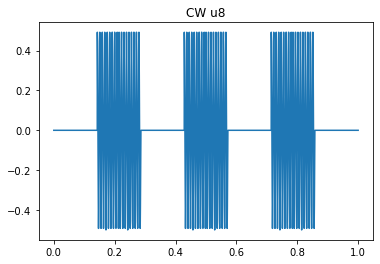

In [26]:
xf = np.linspace(0.0,1.0,len(sample_s8))
plot.plot(xf,sample_s8)
plot.title("CW u8")
plot.show()

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


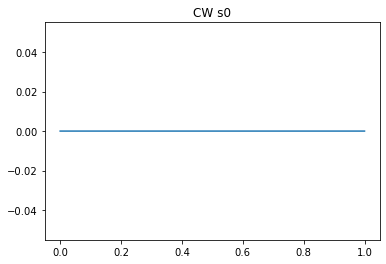

In [27]:
xf = np.linspace(0.0,1.0,len(sample_s0))
plot.plot(xf,sample_s0)
plot.title("CW s0")
plot.show()

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


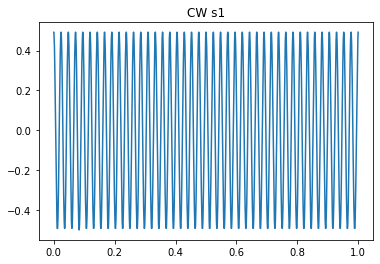

In [28]:
xf = np.linspace(0.0,1.0,len(sample_s1))
plot.plot(xf,sample_s1)
plot.title("CW s1")
plot.show()

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


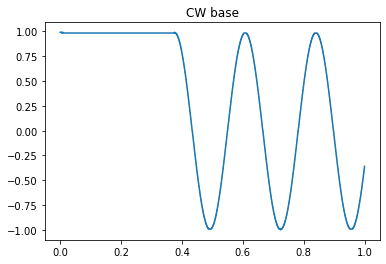

In [29]:
xf = np.linspace(0.0,1.0,len(sample_base))
plot.plot(xf,sample_base)
plot.title("CW base")
plot.show()

7000
7000


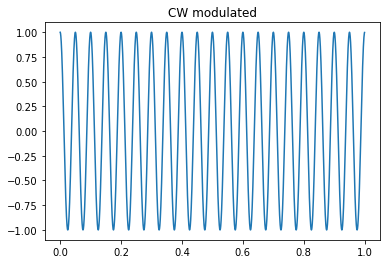

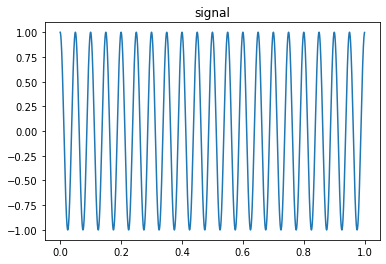

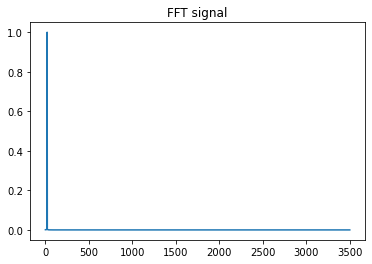

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


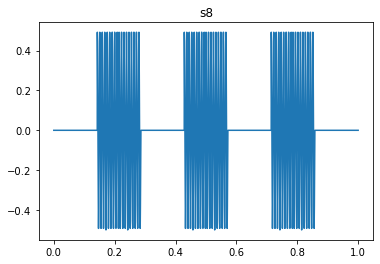

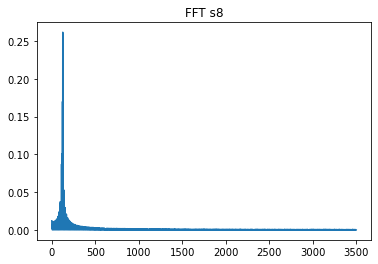

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


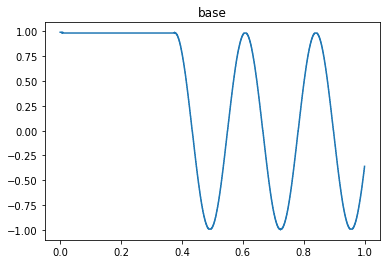

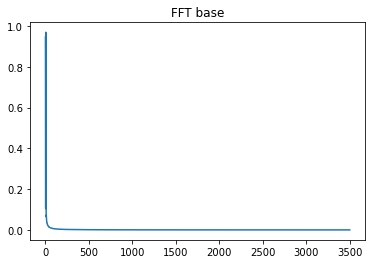

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


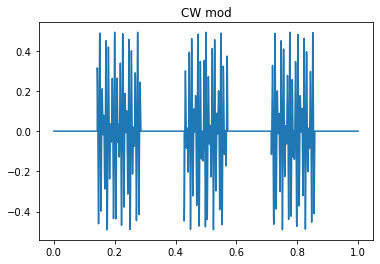

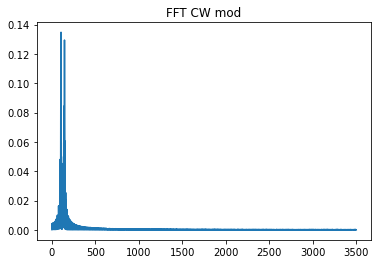

In [30]:
print(len(sample_s8))
print(len(sample_base))
#signal = sample_s8 * sample_base
SIGNAL_FC=20
signal_time = np.arange(0,1.0,1.0/(len(sample_s8)))
signal = np.cos(signal_time*2*3.14*SIGNAL_FC+0.01)
xf = np.linspace(0.0,1.0,len(signal))
plot.plot(xf,signal)
plot.title("CW modulated")
plot.show()

#modulate cw
cw_mod = signal*sample_s8

#draw_fft(signal)
plot_signal(signal,"signal")
draw_fft(signal,"FFT signal")

plot_signal(sample_s8,"s8")
draw_fft(sample_s8,"FFT s8")

plot_signal(sample_base,"base")
draw_fft(sample_base,"FFT base")

plot_signal(cw_mod,"CW mod")
draw_fft(cw_mod,"FFT CW mod")